# Project-2 Classification Part (Bank Marketing Campaign Analysis)

## Data description

#### Characteristics of the data

_Can be divided into three categories_

1) Customer characteristics like age, education etc.
2) Campaign characteristics like days after last campaign, outcome of last campaign etc.
3) Economic factors during the campaign like consumer price index, employment variation rate.

_Customers can be divided into new(who did not take part in the earlier campaigns) and old(took part in old campaign and response recorded)_







### Link to the dataset - https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset

### Loading required libraries ###

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

### Loading dataset

In [4]:
read1 = pd.read_csv(r"C:\Users\samip\Desktop\desk 1\MLpro2\bank-additional-full.csv")

In [5]:
read1.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [6]:
df_new = pd.DataFrame(read1['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'].str.split(';',20).tolist(),columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y'])

In [7]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [8]:
df_new.to_csv('bank-additional-full1', index= False)

In [9]:
z1 = pd.read_csv(r"C:\Users\samip\Desktop\desk 1\MLpro2\bank-additional-full1")

In [10]:
z1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
z1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


### Creating 10% missing values 

In [12]:
z2 = z1.sample(n = 12000, random_state = 2) 

In [13]:
l1 = z2.job.values.tolist()
for i in range(len(l1)):
    
    if l1[i] == '"unknown"':
        l1[i] = np.NaN
        
        
l2 = z2.marital.values.tolist()
for i in range(len(l2)):
    
    if l2[i] == '"unknown"':
        l2[i] = np.NaN

        
l3 = z2.education.values.tolist()
for i in range(len(l3)):
    
    if l3[i] == '"unknown"':
        l3[i] = np.NaN

        
l4 = z2.default.values.tolist()
for i in range(len(l4)):
    
    if l4[i] == '"unknown"':
        l4[i] = np.NaN

        
l5 = z2.housing.values.tolist()
for i in range(len(l5)):
    
    if l5[i] == '"unknown"':
        l5[i] = np.NaN

        
l6 = z2.loan.values.tolist()
for i in range(len(l6)):
    
    if l6[i] == '"unknown"':
        l6[i] = np.NaN


In [14]:
z2a = z2.drop(z2.iloc[:, 1:6], axis = 1) 
z2a.head()

,age,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5485,49,"""no""","""telephone""","""may""","""mon""",146,6,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4390,56,"""no""","""telephone""","""may""","""tue""",88,2,999,0,"""nonexistent""",1.1,93.994,-36.4,4.856,5191.0,"""no"""
38408,70,"""no""","""cellular""","""oct""","""wed""",72,3,999,0,"""nonexistent""",-3.4,92.431,-26.9,0.735,5017.5,"""no"""
9975,40,"""no""","""telephone""","""jun""","""wed""",105,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
5331,39,"""no""","""telephone""","""may""","""fri""",83,2,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


In [15]:
z2a['job'] = l1
z2a['marital'] = l2
z2a['education'] = l3
z2a['default'] = l4
z2a['housing'] = l5
z2a['loan'] = l6

z2a.head()

,age,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,marital,education,default,housing
5485,49,"""no""","""telephone""","""may""","""mon""",146,6,999,0,"""nonexistent""",...,93.994,-36.4,4.857,5191.0,"""no""","""technician""","""married""","""basic.9y""","""no""","""yes"""
4390,56,"""no""","""telephone""","""may""","""tue""",88,2,999,0,"""nonexistent""",...,93.994,-36.4,4.856,5191.0,"""no""","""retired""","""married""","""high.school""",NaN,"""no"""
38408,70,"""no""","""cellular""","""oct""","""wed""",72,3,999,0,"""nonexistent""",...,92.431,-26.9,0.735,5017.5,"""no""","""retired""","""married""","""high.school""","""no""","""yes"""
9975,40,"""no""","""telephone""","""jun""","""wed""",105,3,999,0,"""nonexistent""",...,94.465,-41.8,4.959,5228.1,"""no""","""blue-collar""","""married""","""basic.4y""",NaN,"""no"""
5331,39,"""no""","""telephone""","""may""","""fri""",83,2,999,0,"""nonexistent""",...,93.994,-36.4,4.857,5191.0,"""no""","""blue-collar""","""married""","""basic.9y""","""no""","""yes"""


In [16]:
z3 = z2a
z3.head()
z3.shape

(12000, 21)

In [17]:
z3['emp.var.rate'] = z3['emp.var.rate'].sample(frac=.923) 
z3['cons.price.idx'] = z3['cons.price.idx'].sample(frac=.923) 
z3['cons.conf.idx'] = z3['cons.conf.idx'].sample(frac=.923) 
z3['euribor3m'] = z3['euribor3m'].sample(frac=.923) 
z3['nr.employed'] = z3['nr.employed'].sample(frac=.923) 

In [18]:
null_columns=z3.columns[z3.isnull().any()]

[z3[null_columns].isnull().sum()]

[loan               306
 emp.var.rate       924
 cons.price.idx     924
 cons.conf.idx      924
 euribor3m          924
 nr.employed        924
 job                103
 marital             33
 education          492
 default           2538
 housing            306
 dtype: int64]

In [19]:
z3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 5485 to 38276
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             12000 non-null  int64  
 1   loan            11694 non-null  object 
 2   contact         12000 non-null  object 
 3   month           12000 non-null  object 
 4   day_of_week     12000 non-null  object 
 5   duration        12000 non-null  int64  
 6   campaign        12000 non-null  int64  
 7   pdays           12000 non-null  int64  
 8   previous        12000 non-null  int64  
 9   poutcome        12000 non-null  object 
 10  emp.var.rate    11076 non-null  float64
 11  cons.price.idx  11076 non-null  float64
 12  cons.conf.idx   11076 non-null  float64
 13  euribor3m       11076 non-null  float64
 14  nr.employed     11076 non-null  float64
 15  y               12000 non-null  object 
 16  job             11897 non-null  object 
 17  marital         11967 non-nu

### Imputing the missing values

In [20]:
z3a = z3
z3a = z3a.drop(z3a.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 17, 18, 19, 20]], axis=1)
z3a.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5485,NaN,93.994,-36.4,NaN,5191.0
4390,NaN,93.994,-36.4,4.856,5191.0
38408,-3.4,92.431,-26.9,0.735,5017.5
9975,1.4,94.465,NaN,4.959,5228.1
5331,1.1,93.994,-36.4,4.857,5191.0


### Replace the null value in the numeric column with the MEAN value in the corresponding column. ###

In [21]:
z3a['emp.var.rate'] = z3a['emp.var.rate'].fillna(value= z3a['emp.var.rate'].mean())
z3a['cons.price.idx'] = z3a['cons.price.idx'].fillna(value= z3a['cons.price.idx'].mean())
z3a['cons.conf.idx'] = z3a['cons.conf.idx'].fillna(value= z3a['cons.conf.idx'].mean())
z3a['euribor3m'] = z3a['euribor3m'].fillna(value= z3a['euribor3m'].mean())
z3a['nr.employed'] = z3a['nr.employed'].fillna(value= z3a['nr.employed'].mean())


In [22]:
z3a.isnull().sum()

emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [23]:
z3 = z3.drop(z3.columns[[10, 11, 12, 13, 14]], axis=1)

In [24]:
z4 = pd.concat([z3, z3a], ignore_index=True, sort =False,axis = 1 )

In [25]:
z4.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
5485,49,"""no""","""telephone""","""may""","""mon""",146,6,999,0,"""nonexistent""",...,"""technician""","""married""","""basic.9y""","""no""","""yes""",0.08262,93.994,-36.400000,3.612803,5191.0
4390,56,"""no""","""telephone""","""may""","""tue""",88,2,999,0,"""nonexistent""",...,"""retired""","""married""","""high.school""",NaN,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0
38408,70,"""no""","""cellular""","""oct""","""wed""",72,3,999,0,"""nonexistent""",...,"""retired""","""married""","""high.school""","""no""","""yes""",-3.40000,92.431,-26.900000,0.735000,5017.5
9975,40,"""no""","""telephone""","""jun""","""wed""",105,3,999,0,"""nonexistent""",...,"""blue-collar""","""married""","""basic.4y""",NaN,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1
5331,39,"""no""","""telephone""","""may""","""fri""",83,2,999,0,"""nonexistent""",...,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""",1.10000,93.994,-36.400000,4.857000,5191.0


In [26]:
z4.columns = [ "age", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "y", "job", "marital", "education", "default", "housing", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

In [27]:
z4.head()

,age,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,job,marital,education,default,housing,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5485,49,"""no""","""telephone""","""may""","""mon""",146,6,999,0,"""nonexistent""",...,"""technician""","""married""","""basic.9y""","""no""","""yes""",0.08262,93.994,-36.400000,3.612803,5191.0
4390,56,"""no""","""telephone""","""may""","""tue""",88,2,999,0,"""nonexistent""",...,"""retired""","""married""","""high.school""",NaN,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0
38408,70,"""no""","""cellular""","""oct""","""wed""",72,3,999,0,"""nonexistent""",...,"""retired""","""married""","""high.school""","""no""","""yes""",-3.40000,92.431,-26.900000,0.735000,5017.5
9975,40,"""no""","""telephone""","""jun""","""wed""",105,3,999,0,"""nonexistent""",...,"""blue-collar""","""married""","""basic.4y""",NaN,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1
5331,39,"""no""","""telephone""","""may""","""fri""",83,2,999,0,"""nonexistent""",...,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""",1.10000,93.994,-36.400000,4.857000,5191.0


In [28]:
z4.isnull().sum()

age                  0
loan               306
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
job                103
marital             33
education          492
default           2538
housing            306
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

### Now, Dropping default columns since it has 20% null values which is of no use to us

In [29]:

z4 = z4.drop(columns = 'default', axis= 0)

###  Replace the null values in the categorical column with the MODE of the corresponding column.

In [30]:
 
z4['job']= z4['job'].fillna( z4['job'].value_counts().index[0])
z4['marital']=z4['marital'].fillna(z4['marital'].value_counts().index[0])
z4['education']=z4['education'].fillna(z4['education'].value_counts().index[0])
z4['housing']=z4['housing'].fillna(z4['housing'].value_counts().index[0])
z4['loan']=z4['loan'].fillna(z4['loan'].value_counts().index[0])

In [31]:
z4.isnull().sum()

age               0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
job               0
marital           0
education         0
housing           0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

### Data Preprocessing

_Creating a new dataframe for categorical variables_

In [32]:
X = z4[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
z5 = z4.drop(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],axis=1)
X.head(n=5)
z5.head()



,age,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5485,49,146,6,999,0,"""no""",0.08262,93.994,-36.400000,3.612803,5191.0
4390,56,88,2,999,0,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0
38408,70,72,3,999,0,"""no""",-3.40000,92.431,-26.900000,0.735000,5017.5
9975,40,105,3,999,0,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1
5331,39,83,2,999,0,"""no""",1.10000,93.994,-36.400000,4.857000,5191.0


_Creating  dummy variable for categorical columns_

In [33]:

X= pd.get_dummies(X)
X.head()
z6 = pd.concat([X,z5],axis=1)
z6.head()



,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""",...,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5485,0,0,0,0,0,0,0,0,0,1,...,146,6,999,0,"""no""",0.08262,93.994,-36.400000,3.612803,5191.0
4390,0,0,0,0,0,1,0,0,0,0,...,88,2,999,0,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0
38408,0,0,0,0,0,1,0,0,0,0,...,72,3,999,0,"""no""",-3.40000,92.431,-26.900000,0.735000,5017.5
9975,0,1,0,0,0,0,0,0,0,0,...,105,3,999,0,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1
5331,0,1,0,0,0,0,0,0,0,0,...,83,2,999,0,"""no""",1.10000,93.994,-36.400000,4.857000,5191.0


_Resetting the index values of the dataframe to 0_

In [34]:
z6.reset_index(inplace = True)
z6.head()



,index,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""",...,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,5485,0,0,0,0,0,0,0,0,0,...,146,6,999,0,"""no""",0.08262,93.994,-36.400000,3.612803,5191.0
1,4390,0,0,0,0,0,1,0,0,0,...,88,2,999,0,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0
2,38408,0,0,0,0,0,1,0,0,0,...,72,3,999,0,"""no""",-3.40000,92.431,-26.900000,0.735000,5017.5
3,9975,0,1,0,0,0,0,0,0,0,...,105,3,999,0,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1
4,5331,0,1,0,0,0,0,0,0,0,...,83,2,999,0,"""no""",1.10000,93.994,-36.400000,4.857000,5191.0


__Re-Mapping the target column where 'y' = 1 and 'n' = 0 or 'yes' = 1 and 'no' = 0__

In [35]:

z11 = z6.y.astype("category").cat.codes
z12 = pd.DataFrame(z11, columns= ['target'])
z12.head()



,target
0,0
1,0
2,0
3,0
4,0


In [36]:

d_final = pd.concat([z6,z12],axis=1)
d_final.head()



,index,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""",...,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,5485,0,0,0,0,0,0,0,0,0,...,6,999,0,"""no""",0.08262,93.994,-36.400000,3.612803,5191.0,0
1,4390,0,0,0,0,0,1,0,0,0,...,2,999,0,"""no""",0.08262,93.994,-36.400000,4.856000,5191.0,0
2,38408,0,0,0,0,0,1,0,0,0,...,3,999,0,"""no""",-3.40000,92.431,-26.900000,0.735000,5017.5,0
3,9975,0,1,0,0,0,0,0,0,0,...,3,999,0,"""no""",1.40000,94.465,-40.509363,4.959000,5228.1,0
4,5331,0,1,0,0,0,0,0,0,0,...,2,999,0,"""no""",1.10000,93.994,-36.400000,4.857000,5191.0,0


_Now, let's append it to our original dataframe_ 

In [37]:
#Dropping the index column and y column which has the unmapped values 
d_final2 = d_final.drop(['index','y'], axis = 1)
d_final2.head()

df2 = d_final2
df2.head()

,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""",...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,0,0,0,0,0,0,0,0,0,1,...,146,6,999,0,0.08262,93.994,-36.400000,3.612803,5191.0,0
1,0,0,0,0,0,1,0,0,0,0,...,88,2,999,0,0.08262,93.994,-36.400000,4.856000,5191.0,0
2,0,0,0,0,0,1,0,0,0,0,...,72,3,999,0,-3.40000,92.431,-26.900000,0.735000,5017.5,0
3,0,1,0,0,0,0,0,0,0,0,...,105,3,999,0,1.40000,94.465,-40.509363,4.959000,5228.1,0
4,0,1,0,0,0,0,0,0,0,0,...,83,2,999,0,1.10000,93.994,-36.400000,4.857000,5191.0,0


### Checking for data correlation by plotting a correlation Matrix.

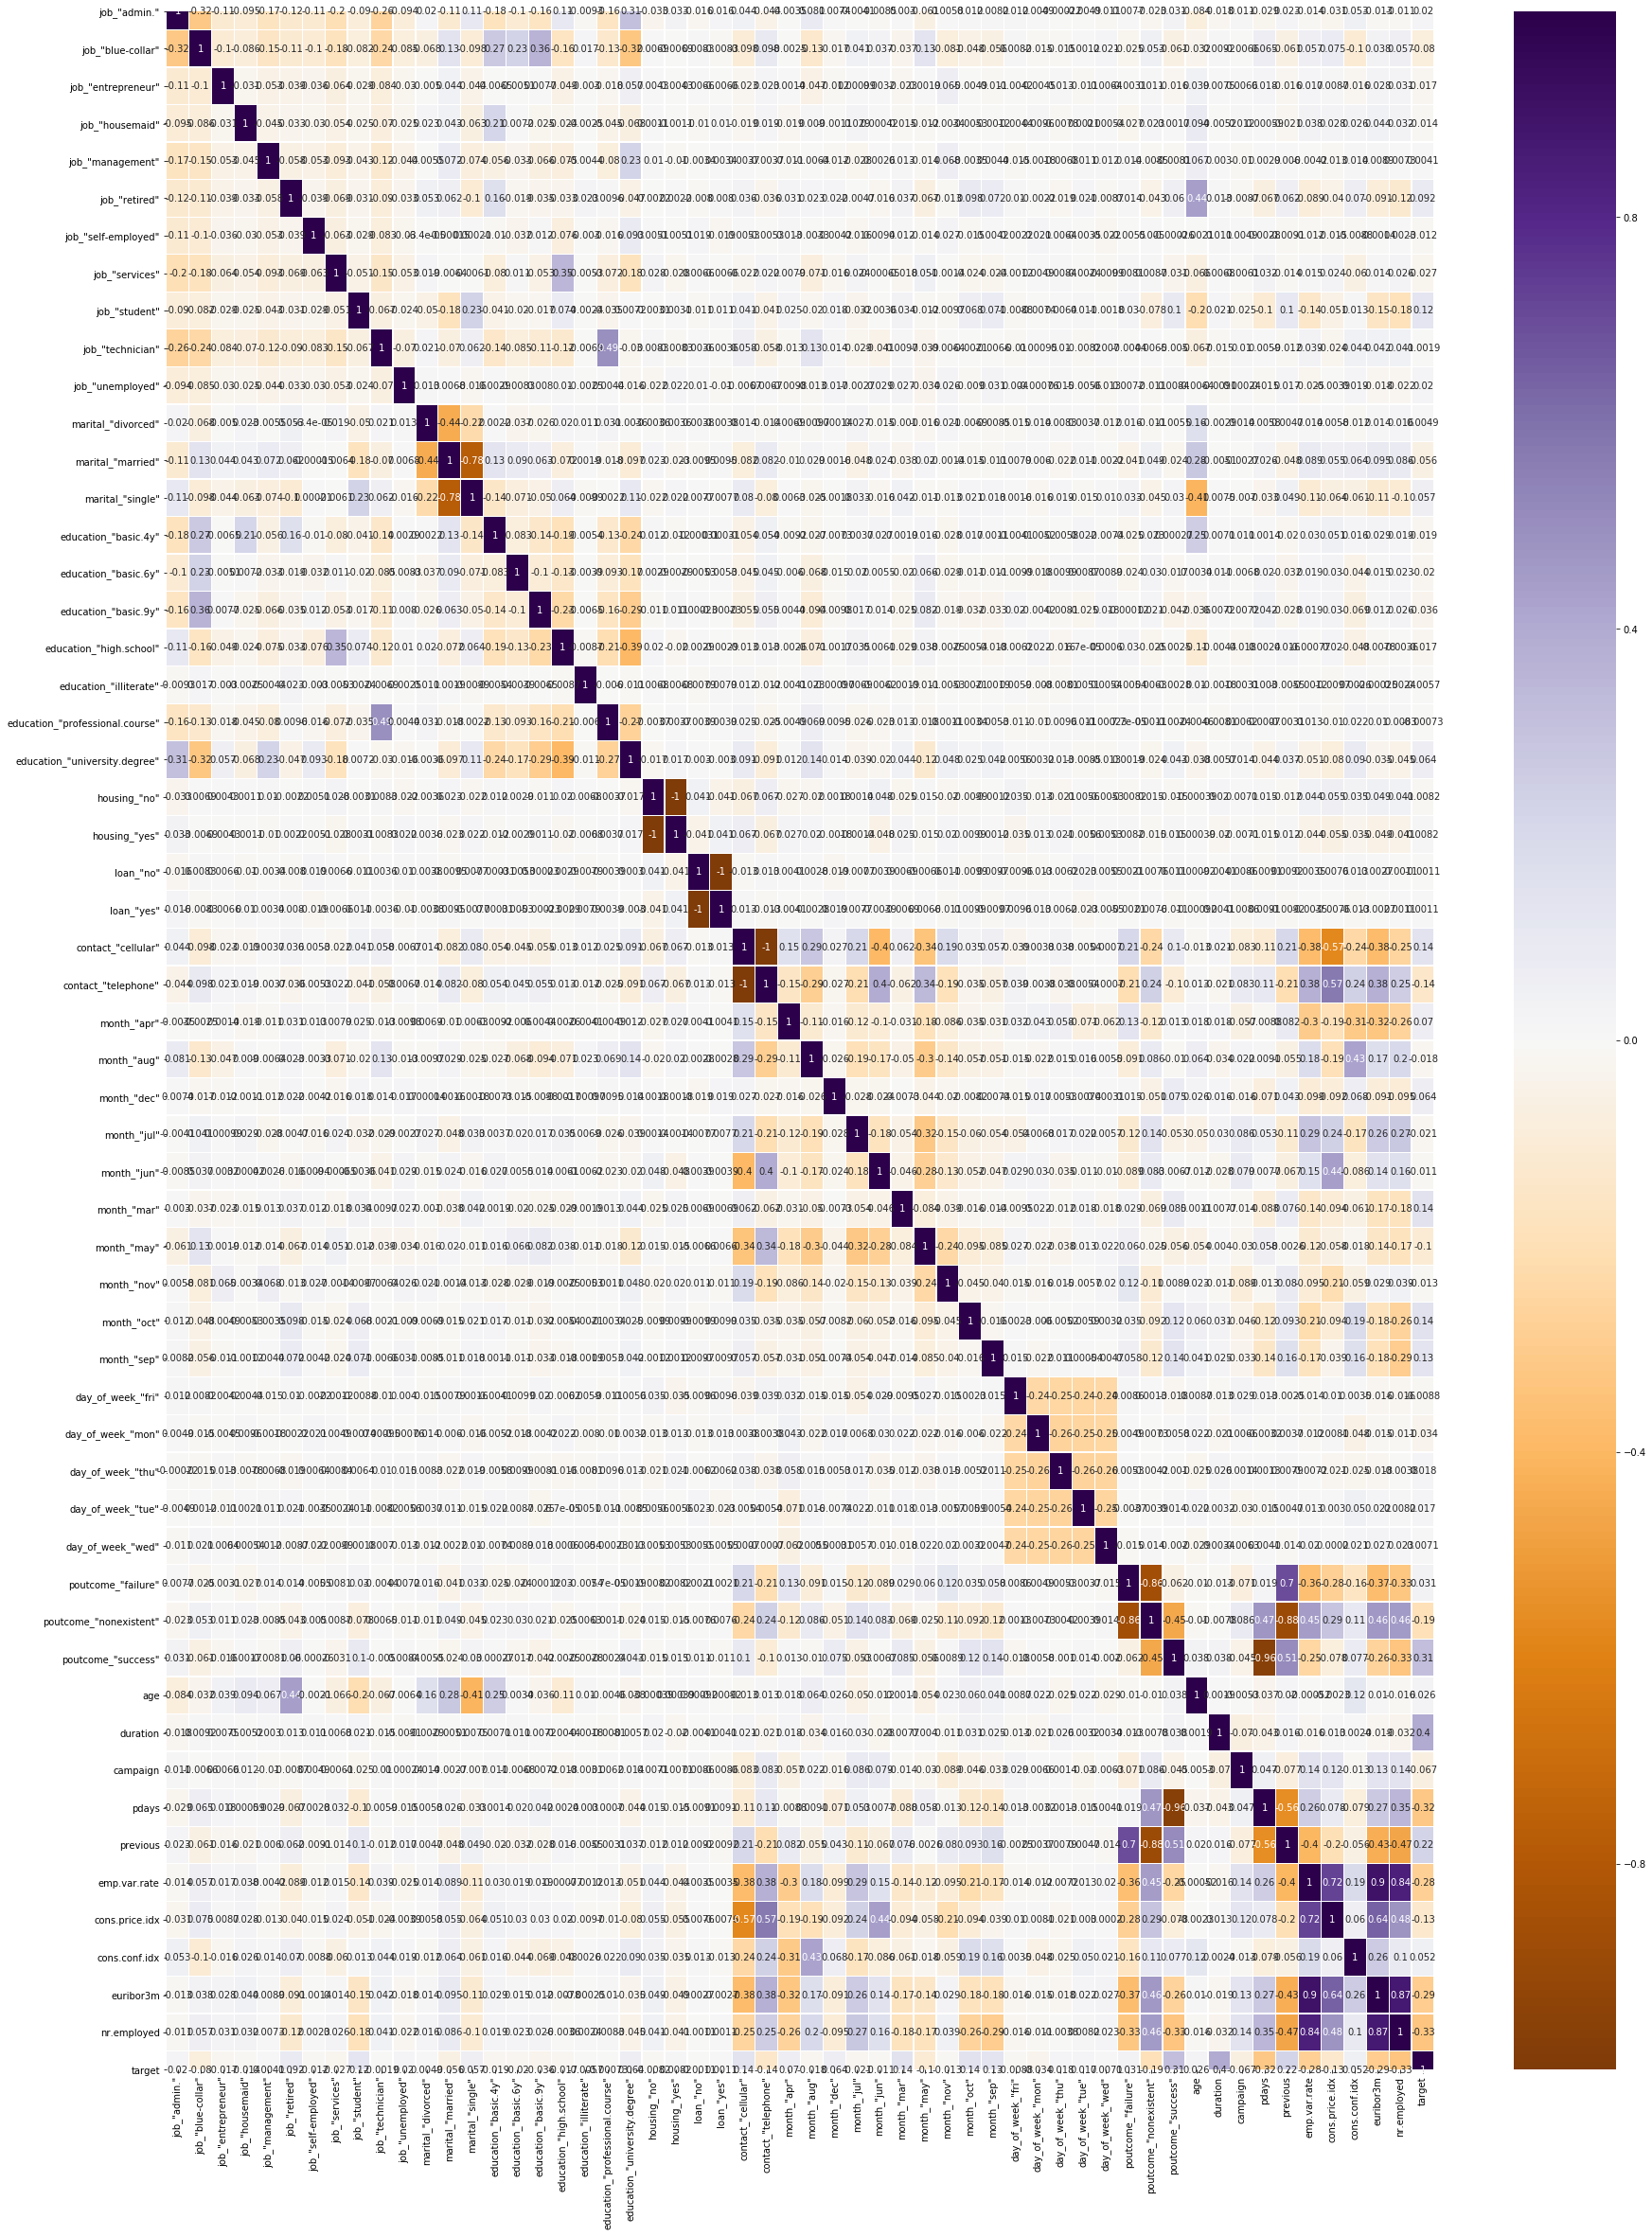

In [38]:
cl_cor = df2.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize=(30,40)) 
sns.heatmap(cl_cor,annot=True,cmap='PuOr',linewidths=0.30, ax=ax)

## EDA for all of the categorical columns

### Plotting all the required barplots for marital,job, education, contact, loan, housing, day of week, poutcome vs target count

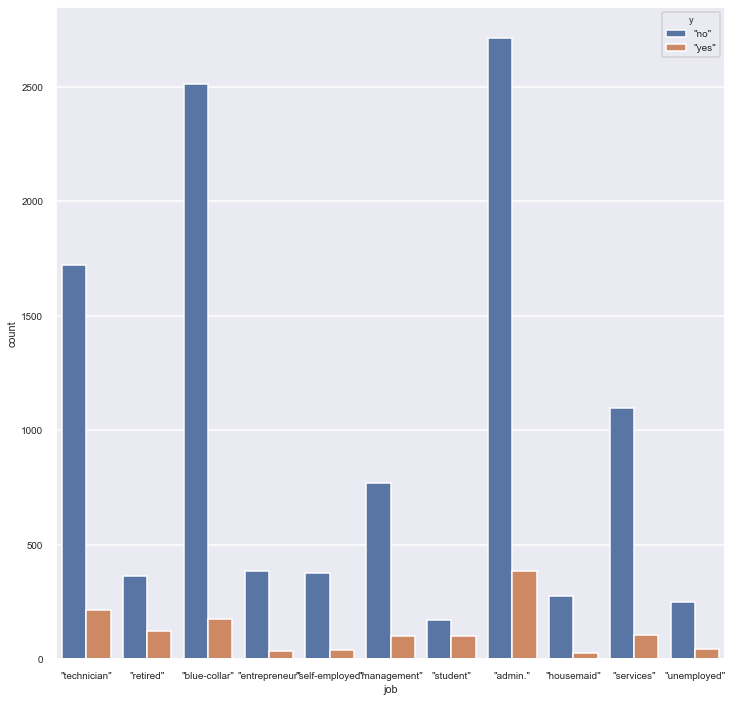

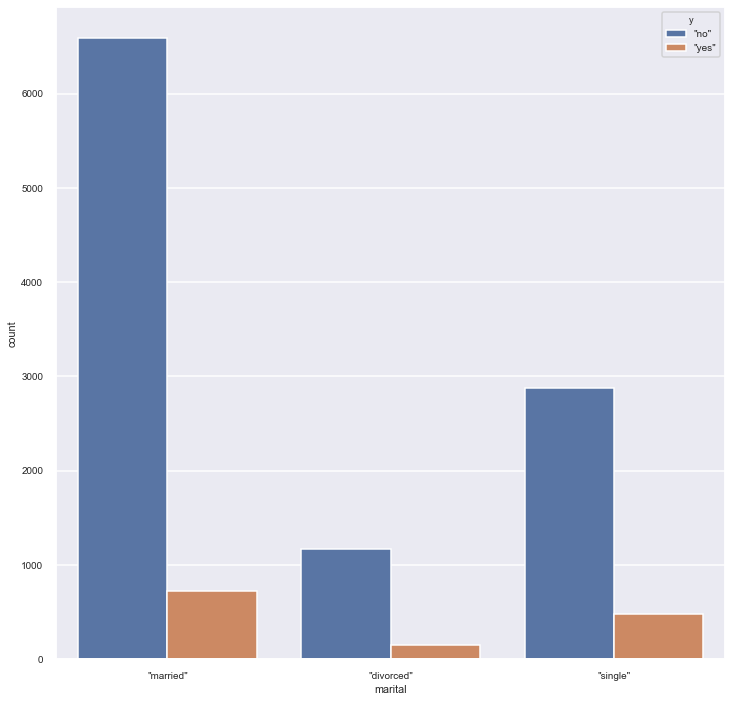

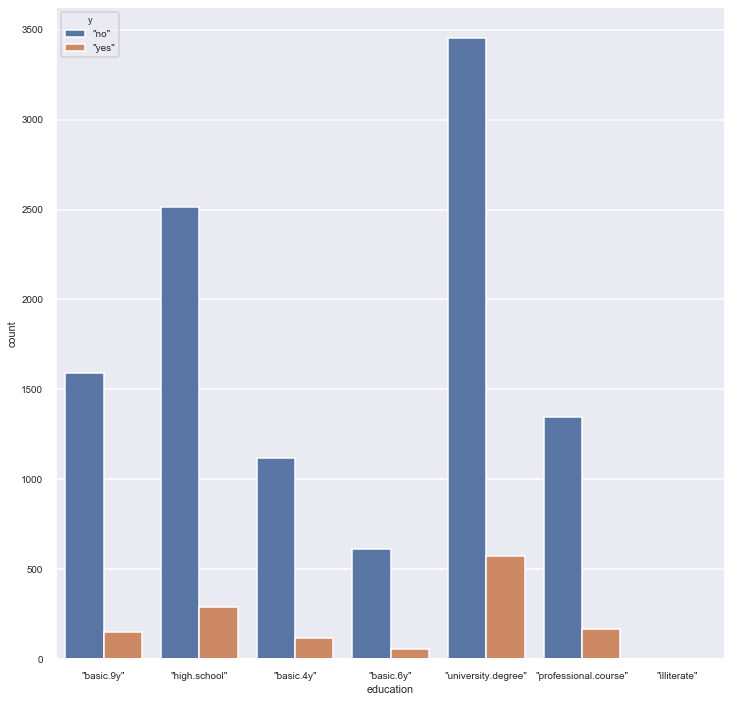

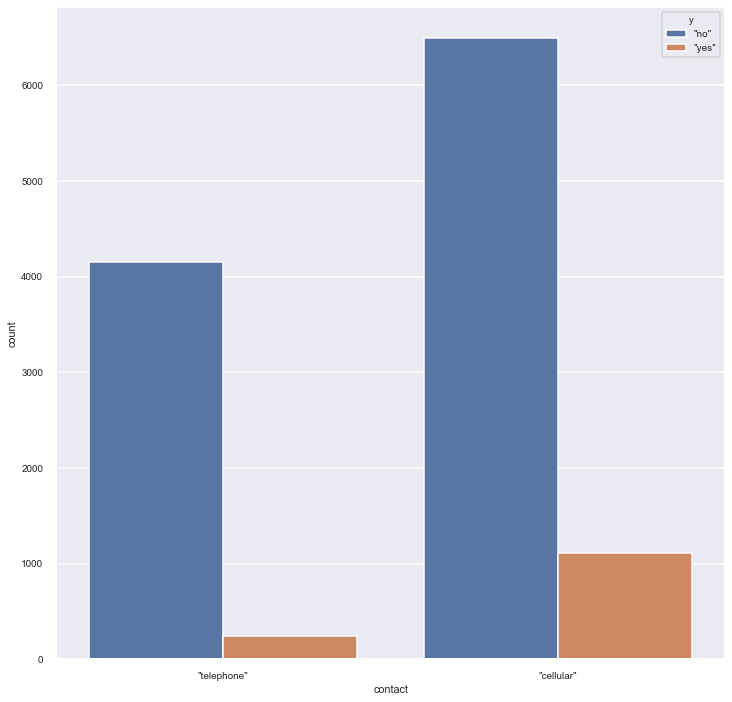

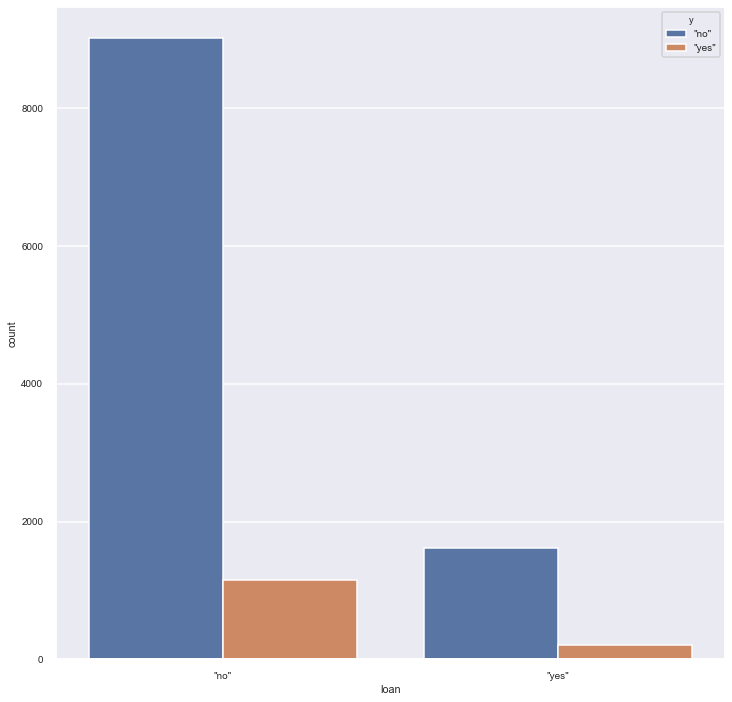

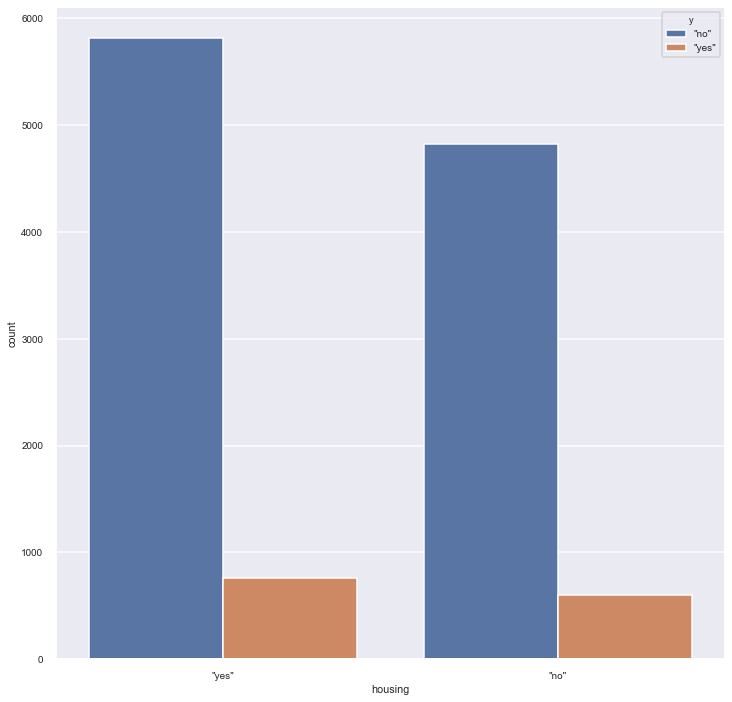

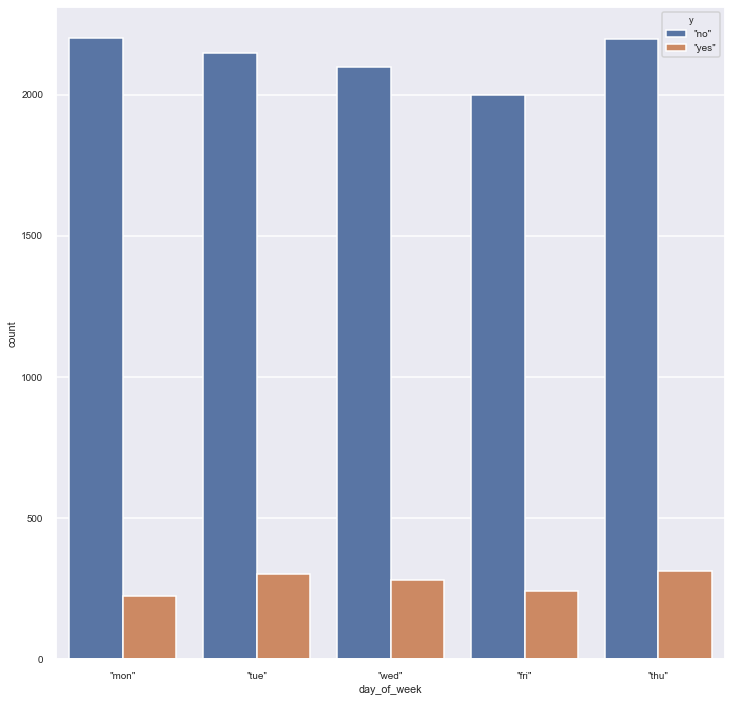

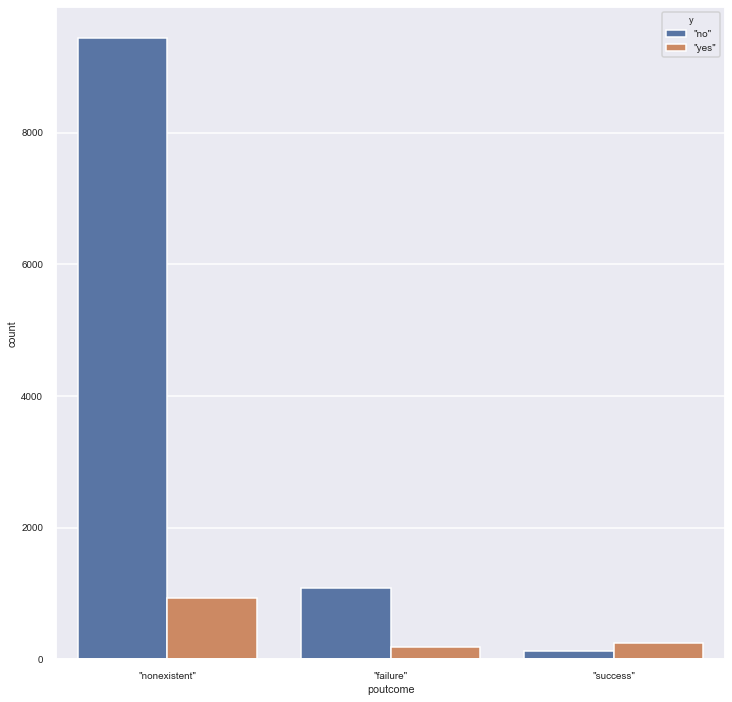

In [39]:
lst = [z4.job, z4.marital, z4.education, z4.contact, z4.loan, z4.housing, z4.day_of_week, z4.poutcome]
for p in range(len(lst)):
    sns.set(rc={'figure.figsize':(12,12)})
    sns.set_context("talk", font_scale=0.6)
    gen = sns.countplot(x= lst[p], hue='y', data=z4 )
    gen.set_xticklabels(lst[p].unique())
    plt.show()

## EDA for numerical columns 

In [40]:
d7 = pd.DataFrame(df2, columns = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','target'])

In [41]:
num_cor = d7.corr()

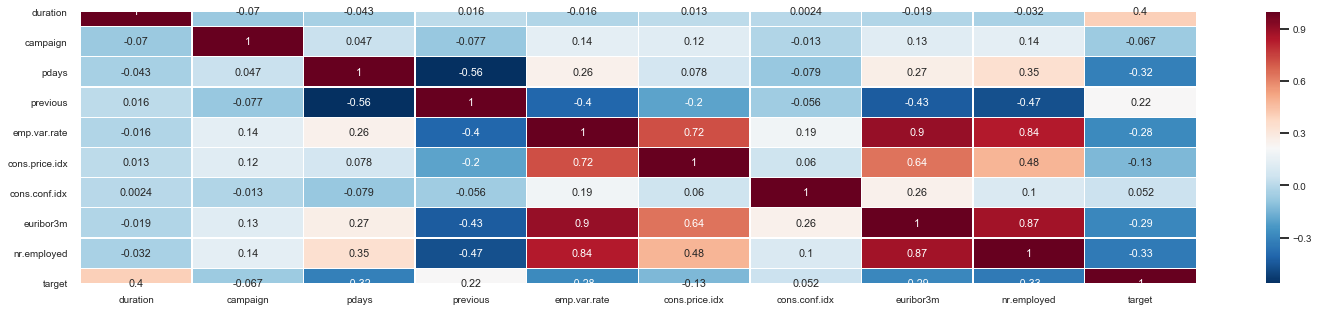

In [42]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,5)) 
sns.heatmap(num_cor,annot=True,cmap='RdBu_r',linewidths=0.30, ax=ax)

In [43]:
# Dropping the two columns euribor3m and nr.employed since they are not much related with the target column and are also
# highly correlated which might affect our classification models.

In [44]:
df2 = df2.drop(['nr.employed','euribor3m'],axis = 1)

## Creating numpy arrays for features and target

In [45]:
X = df2.drop('target',axis=1).values
y = df2['target'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.80000000e+00,  9.35715874e+01, -4.62000000e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.10000000e+00,  9.39940000e+01, -3.64000000e+01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.10000000e+00,  9.39940000e+01, -3.64000000e+01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.80000000e+00,  9.28930000e+01, -4.62000000e+01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -2.00000000e-01,  9.27560000e+01, -4.59000000e+01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         8.26200795e-02,  9.28930000e+01, -4.62000000e+01]])

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. KNN Classification

In [48]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

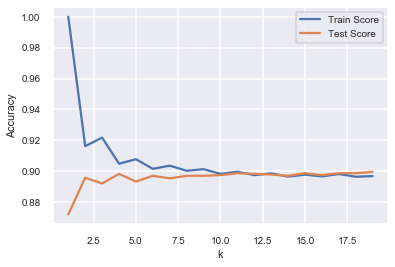

In [49]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score')
plt.plot(x_axis, test_score_array, label = 'Test Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8983
Test score: 0.8975


In [51]:
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20,25]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.89


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   16.4s finished


In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.884375   0.88854167 0.88125    0.88958333 0.875      0.9
 0.903125   0.884375   0.896875   0.9       ]
0.8903125000000001


In [53]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[2129  234]
 [  10   27]]
0.18120805369127516


## KNN Classification summary

### Train score : 0.8982
### Test score : 0.8975
### Cross validation score : 0.89
### Best Parameters : {'n_neighbors': 10}
### F1 score : 0.175

## 2. Logistic Regression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

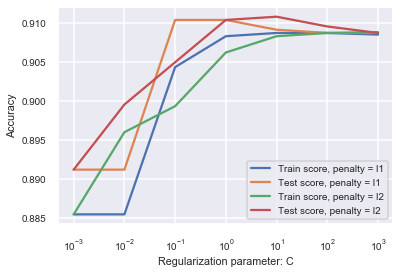

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [57]:
log_l2 = LogisticRegression(penalty = 'l2', C = 1)
log_l2.fit(X_train, y_train)
print(log_l2.score(X_train, y_train))
print(log_l2.score(X_test, y_test))

0.90625
0.9104166666666667


In [58]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
log_l1.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
print(log_l1.score(X_test, y_test))

0.9084375
0.9104166666666667


In [59]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [60]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.91


In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 100)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.90125  0.910625 0.893125 0.915625 0.91125  0.906875]
0.9064583333333335


In [62]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l2', C = 100)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.5056947608200455
[[2072  150]
 [  67  111]]


## Logistic Regression summary

### Train score : 0.9062
### Test score : 0.911
### Cross validation score : 0.91
### Best Parameters : {'C': 100, 'penalty': 'l1'} 
### F1 score : 0.531

##  3. Kernelized Support Vector Machine  - rbf

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

In [65]:
print(train)
print(test)
print(index)

[0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.8968888888888888, 0.885, 0.885, 0.885, 0.885, 0.8968888888888888, 0.8994444444444445, 0.9585555555555556, 0.975, 0.9942222222222222, 0.8968888888888888, 0.8976666666666666, 0.9526666666666667, 0.9834444444444445, 0.9967777777777778, 0.9997777777777778, 0.8972222222222223, 0.9174444444444444, 0.9861111111111112, 0.9968888888888889, 0.9997777777777778, 1.0]
[0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8976666666666666, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667, 0.8976666666666666, 0.8976666666666666, 0.8923333333333333, 0.8913333333333333, 0.8916666666666667, 0.8976666666666666, 0.897, 0.9043333333333333, 0.87966666666

In [67]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [68]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.90


In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 100,gamma = 0.01)
kfold = KFold(n_splits=6)
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.89533333 0.906      0.89133333 0.918      0.906      0.90266667]
0.9032222222222223


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 100 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
fl = f1_score(ypred,y_test)
print(cm)
print(fl)

[[2588  193]
 [  87  132]]
0.4852941176470588


## Kernel Support Vector Machine  - rbf Summary

### Train score : 0.902
### Test score : 0.906
### Cross validation score : 0.90
### Best Parameters : {'C': 100, 'gamma': 0.01}
### F1 score : 0.47689

##  4. Decision Tree

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.878


In [73]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.903


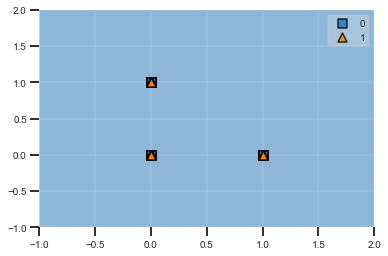

In [74]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:2000,[2,9]]
y_b = y_train[:2000]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.886      0.88666667 0.878      0.9        0.89533333 0.896     ]
0.8903333333333333


In [76]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=11, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[2509  158]
 [ 166  167]]
0.5075987841945289


## Decision Tree Summary

### Train score : 0.914
### Test score : 0.904
### Cross validation score : 0.889
### F1 score : 0.5

## Gaussian Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [78]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [79]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
print(gnb_clf.score(X_train,y_train))
print(gnb_clf.score(X_test,y_test))

0.7883333333333333
0.786


## Soft Voting


### Soft voting using logistic regression and Gaussian naive bayes

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [82]:
log_clf = LogisticRegression(C=10)
log_clf.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('Gaussian',gnb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [84]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,gnb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9091666666666667
GaussianNB 0.8675
VotingClassifier 0.8741666666666666


## Hard Voting
### Hard voting using knn classifier and Gaussian naive bayes

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [86]:
voting_clf = VotingClassifier(estimators=[('knn', knn),('Gaussian',gnb_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=20,
                                                   p=2, weights='uniform')),
                             ('Gaussian',
                              GaussianNB(priors=None, var_smoothing=1e-09))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [87]:

from sklearn.metrics import accuracy_score
for clf in (knn,gnb_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.8991666666666667
GaussianNB 0.8675
VotingClassifier 0.9


## Bagging

### Bagging with decision tree

In [88]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [89]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}

In [90]:
clf = GridSearchCV(BaggingClassifier(dtree,
                                     n_estimators = 100, bootstrap=True,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=11,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                     

In [91]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.2}


In [92]:
y_pred = clf.predict(X_test)

In [93]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.90875


In [94]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 0.95
Test score: 0.91


In [95]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.89125


### Bagging with logistic regression

In [96]:
bag_log_clf = GridSearchCV(BaggingClassifier(log_clf,
                                     n_estimators = 100, max_features = 8,bootstrap=True, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=10,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                            

In [97]:
y_pred = bag_log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89125


In [98]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.89
Test score: 0.89


## Pasting

### Pasting with decision tree

In [99]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [100]:
param_grid = {
    'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]
}

In [101]:
clf = GridSearchCV(BaggingClassifier(dtree,
                                     n_estimators = 100, bootstrap=False,random_state=0),
                   param_grid, cv=6)
clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=11,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                     

In [102]:
print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_samples': 0.1}


In [103]:
y_pred = clf.predict(X_test)

In [104]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9075


In [105]:
clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.91


In [106]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.89125


### Pasting with logistic regression

In [107]:
bag_log_clf = GridSearchCV(BaggingClassifier(LogisticRegression(),
                                     n_estimators = 100, max_features = 8,bootstrap=False, random_state=0),
                   param_grid, cv=6)
bag_log_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                           

In [108]:
y_pred = bag_log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89125


In [109]:
bag_log_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log_clf.score(X_test, y_test)))

Train score: 0.89
Test score: 0.89


## ADABoost

### ADABoost with Decision Tree

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [112]:
dtree_clf = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [113]:
param_grid = {
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators' : [100,200,300,400,500,600,700]
}

In [114]:
ada_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", random_state=0),param_grid,cv=6)
ada_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min

In [115]:
print("Best parameters: {}".format(ada_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_clf.best_score_))

Best parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best cross-validation score: 0.91


In [116]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9129166666666667


__Best cross-validation score is 0.91 for Decision Tree with Ada-Boost__

## Gradiant boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [119]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [120]:
gbr_clf = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=6)
gbr_clf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [121]:
print("Best parameters: {}".format(gbr_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(gbr_clf.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.91


_Now we are setting maximum depth is equal to 0_

In [122]:

gbrt = GradientBoostingClassifier(random_state=0,max_depth=4)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## PCA

In [123]:
from sklearn.decomposition import PCA

In [124]:
df2_pca = df2

In [125]:
X = df2_pca.drop('target',axis=1).values
y = df2_pca['target'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [127]:
#Model Creation
pca = PCA(n_components=0.95,random_state = 0)

In [128]:
#training pca model and transforming X_train and X_test
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [129]:
X_train_reduced

array([[-164.12524181,  -22.86018314],
       [ 158.10820609,  -45.14866372],
       [ -68.35424762,  -29.48923887],
       ...,
       [ -88.3049211 ,  -28.10806976],
       [ -91.29787591,  -27.89188443],
       [-145.17082969,  -24.21585273]])

In [130]:
pca.explained_variance_

array([65115.89975819, 32587.76936689])

In [131]:
pca.explained_variance_ratio_

array([0.66547723, 0.33304336])

In [132]:
pca.n_components_

2

In [133]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)

## KNN (after applying PCA)

In [134]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

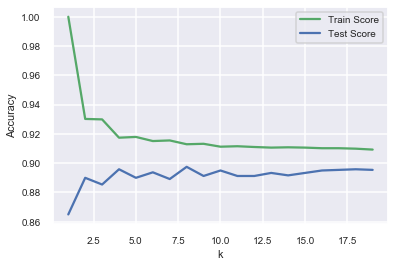

In [135]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [136]:
knn = KNeighborsClassifier(8)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

0.9129166666666667
0.8975


In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=8)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.88666667 0.9025     0.91       0.88083333 0.91       0.91
 0.90166667 0.905     ]
0.9008333333333334


In [138]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(2)
knn.fit(X_train_pca, y_train)
ypred = knn.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[2087  212]
 [  52   49]]
0.27071823204419887


### KNN Classification Summary - Before PCA

### Train score : 0.8982
### Test score : 0.8975
### Cross validation score : 0.89
### Best Parameters : {'n_neighbors': 10}
### F1 score : 0.175

### KNN Classification Summary - After PCA

### Train score :0.913
### Test score : 0.896
### Cross validation score :0.900
### Best Parameters : {'n_neighbors': 8}
### F1 score : 0.2699

## Logistic Regression (after applying PCA)

In [139]:
#model creation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
pca = PCA(n_components=0.95,random_state = 0)

#Training pca 
pca.fit(X_train)

#Transforming both X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [140]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

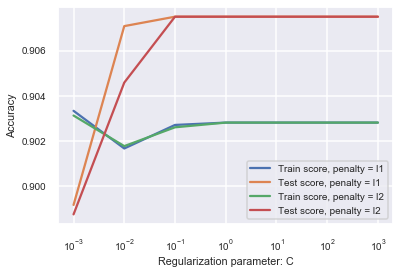

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [142]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [143]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'penalty': 'l1'}
Best cross-validation score: 0.90


In [144]:
log_l2 = LogisticRegression(penalty = 'l1', C = 0.001)
log_l2.fit(X_train_reduced, y_train)
print(log_l2.score(X_train_reduced, y_train))
print(log_l2.score(X_test_reduced, y_test))

0.9033333333333333
0.8991666666666667


In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.001)
kfold = KFold(n_splits=2)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l2 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.88479167 0.90625   ]
0.8955208333333333


In [146]:
from sklearn.metrics import f1_score
log_l2 = LogisticRegression(penalty = 'l1', C = 0.001)
log_l2.fit(X_train_reduced, y_train)
ypred = log_l2.predict(X_test_reduced)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.47161572052401746
[[2050  153]
 [  89  108]]


### Logistic Regression Summary - Before PCA

### Train score : 0.9062
### Test score : 0.911
### Cross validation score : 0.91
### Best Parameters : {'C': 100, 'penalty': 'l1'} 
### F1 score : 0.531

### Logistic Regression Summary - After PCA

### Train score : 0.9033
### Test score : 0.8991
### Cross validation score :0.8955
### Best Parameters : {'C': 0.001, 'penalty': 'l1'} 
### F1 score : 0.47161

## Decision Tree (after applying PCA)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [148]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

In [149]:
dtree_clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid, cv=6, return_train_score=True)
dtree_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [150]:
print("Best parameters: {}".format(dtree_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_clf.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.90


In [151]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.907
Accuracy on test set: 0.902


In [152]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.89125  0.905    0.895    0.914375 0.915    0.905   ]
0.9055208333333332


In [153]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_reduced, y_train)
ypred = dtree.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[2060  155]
 [  79  106]]
0.47533632286995514


### Decision tree summary - Before PCA

### Train score : 0.914
### Test score : 0.904
### Cross validation score : 0.89
### F1 score : 0.44247

### Decision tree summary - After PCA

### Train score : 0.907
### Test score : 0.902
### Cross validation score :  0.90687
### F1 score : 0.47533

## SVC with Kernel-rbf (after applying PCA)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
scaler = MinMaxScaler()
scaler.fit(X_train_reduced)
X_train_reduced = scaler.transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)


In [155]:
X_train_reduced.shape, y_train.shape

((9600, 2), (9600,))

In [156]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train_reduced, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train_reduced, y_train))
        test.append(svc.score(X_test_reduced, y_test))
        index.append((C,gamma))

In [157]:
print(train)
print(test)
print(index)

[0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8855208333333333, 0.8965625, 0.8976041666666666, 0.8855208333333333, 0.8855208333333333, 0.8965625, 0.8965625, 0.8970833333333333, 0.9016666666666666, 0.8855208333333333, 0.8965625, 0.8965625, 0.8965625, 0.8985416666666667, 0.9053125, 0.8965625, 0.8965625, 0.8965625, 0.896875, 0.9002083333333334, 0.905, 0.8965625, 0.8965625, 0.8965625, 0.8970833333333333, 0.9028125, 0.9051041666666667]
[0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.89125, 0.8970833333333333, 0.89875, 0.89125, 0.89125, 0.8983333333333333, 0.8983333333333333, 0.8983333333333333, 0.905, 0.89125, 0.8983333333333333, 0.8983333333333333, 0.8970833333333333, 0.9004166666666666, 0.9075, 0.8983333333333333, 0.8983333333333333, 0.8983333333333333, 0.8970833333333333, 0.9058333333333334, 0.9058333333333334, 0.8983

In [158]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [159]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 100}
Best cross-validation score: 0.90


In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 100,gamma = 100)
kfold = KFold(n_splits=6)
scores = cross_val_score(svc1 , X_train_reduced, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.895    0.91375  0.8925   0.913125 0.909375 0.905625]
0.9048958333333332


In [161]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 100 , gamma = 100)
svc.fit(X_train_reduced, y_train)
ypred = svc.predict(X_test_reduced)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

[[2075  163]
 [  64   98]]
0.4633569739952718


### Kernel Support Vector Machine  - RBF Summary - before PCA

### Train score : 0.91688
### Test score : 0.90633
### Cross validation score : 0.90244
### Best Parameters : {'C': 100, 'gamma': 0.001}
### F1 score : 0.46777

### Kernel Support Vector Machine  - RBF Summary - after PCA

### Train score : 0.90510
### Test score :0.90541
### Cross validation score : 0.9048
### Best Parameters : {'C': 100, 'gamma': 100}
### F1 score : 0.4633

# Conclusion

### After executing PCA the performance of only KNN improved whereas with other models i.e. SVC, Decision tree and Logistic Regression it decreased by a slight margin. The F1 score of KNN(0.2707) increased but was still lesser than the F1 score of Decision Tree(0.4753). Also, I would conclude that after running PCA the overall Accuracy of most of the models decreased. 

## Neural network

In [162]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#split data set into train and test
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [163]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org.astype(float))
X_test = scaler.transform(X_test_org.astype(float))

In [164]:
X_train.shape

(9000, 53)

In [165]:
import tensorflow 
import keras

In [166]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(100)

In [167]:
# step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 53, activation = 'relu'))
#hidden layer
model1.add(Dense(2, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

# step 4: model evaluation

Epoch 1/20
90/90 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.8850
Epoch 2/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8850
Epoch 3/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8850
Epoch 4/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8850
Epoch 5/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8850
Epoch 6/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8850
Epoch 7/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8850
Epoch 8/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8850
Epoch 9/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8850
Epoch 10/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8850
Epoch 11/20
90/90 [

In [168]:
model1.evaluate(X_train, y_train)

282/282 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.8986


[0.21270295977592468, 0.8985555768013]

In [169]:
model1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9040


[0.211130753159523, 0.9039999842643738]

In [170]:
y_pred = model1.predict(X_train)

In [171]:
from sklearn.metrics import precision_score
y_train_pred = np.where(y_pred >= 0.5, 1, 0)
precision_score(y_train, y_train_pred)

0.585195530726257